<a href="https://colab.research.google.com/github/buttersaltpepper/Data-Analysis/blob/main/EDA_Housing_Price/statistical_inferences_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Statistical Inferences in Python**

# **Content**
**1. Pearson Correlation $(r)$ and p-value**

**2. Linear Regression**

**3. One-way ANOVA, T-test, p-value**

**4. MLR / OLS in statsmodels**

**5. Probability Distributions**

**6. More Statistical Inference in Python**






In [1]:
import pandas as pd
import numpy as np

from scipy.stats import kurtosis, skew

import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,5)

In [2]:
df = pd.read_csv('http://www.ishelp.info/data/insurance.csv')
df.dtypes, df.shape, df.nunique()

(age           int64
 sex          object
 bmi         float64
 children      int64
 smoker       object
 region       object
 charges     float64
 dtype: object, (1338, 7), age           47
 sex            2
 bmi          548
 children       6
 smoker         2
 region         4
 charges     1337
 dtype: int64)

**From here, we already have an idea of which tests to use:**
* Age vs Charges -> Numeric vs Numeric -> *Correlation (r)*
* Sex vs Charges -> Categorical vs Numeric -> *One-way ANOVA or t-test*
* BMI vs Charges -> Numeric vs Numeric -> *Correlation (r)*
* Children vs Charges -> Numeric vs Numeric -> *Correlation (r)*
* Region vs Charges -> Categorical vs Numeric -> *One-way ANOVA*

In [3]:
df['smoker'] = df['smoker'].map({'yes':1, 'no':0})
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520


In [4]:
df.describe()

,age,bmi,children,smoker,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,0.204783,13270.422265
std,14.049960,6.098187,1.205493,0.403694,12110.011237
min,18.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,0.000000,9382.033000
75%,51.000000,34.693750,2.000000,0.000000,16639.912515
max,64.000000,53.130000,5.000000,1.000000,63770.428010


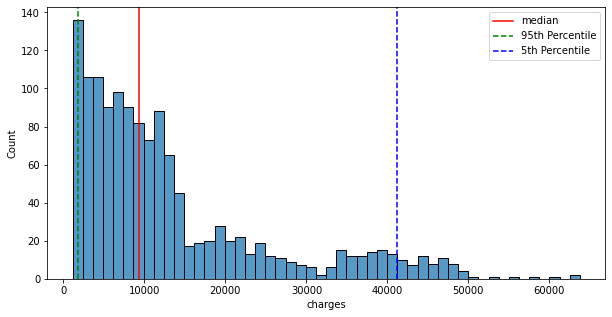

In [5]:
# Visualise Label
sns.histplot(df.charges, bins=50)
plt.axvline(df.charges.median(), c='r', label='median')
plt.axvline(np.percentile(df.charges,5), c='g', linestyle='--', label='95th Percentile')
plt.axvline(np.percentile(df.charges,95), c='b', linestyle='--', label='5th Percentile')
plt.legend()
plt.show()

# Normality Test

In [6]:
# standard deviation
print('stdev:', df.charges.std())

# Normality Test:
# kurtosis
print('Kurtosis: {:.3f}'.format(kurtosis(df.charges)))

# skewness
print('Skewness: {:.3f}'.format(skew(df.charges)))

stdev: 12110.011236694001
Kurtosis: 1.596
Skewness: 1.514


Normality Test:
- Kurtosis near 0 (some packages calculates Excess Kurtosis 3)
- Skewness near 0




# Effect Size
The relationship of a feature with the label - the amount of effect that each feature has on the label

Tests for effect size/relationship:
* **Numeric Label vs Numeric Feature -> Pearson correlation $(r)$**
* **Numeric Label vs Categorical Feature -> One-Way ANOVA $(F)$**
* **Categorical Label vs Categorical Feature -> Pearson Chi-Square $(X^2)$**

# Pearson correlation $(r)$ and p-value
* looks at how much two numeric variables influence each other
* the Correlation Coefficient 'r' ranges from -1 to 1
* Mathematically, r is calculated by summing the product of differences between each feature(x) and label(y) from their means divided by the product of summed, suqared differences.


**Visually:**
* r = -1 or 1.0 would show complete straight line
* Doesn't describe the slope, or angle
* It just describes how much each data overlap


* r = -0.87 or 0.91 would show more spread out data


**Assumptions**
* Continuous data (can still use r, but just interpet differently)
* Linear relationship (means theres linear trend, straight line can be drawn)
* Homoskedastic relationship (doesnt change over change in feature)



In [7]:
from scipy import stats

In [8]:
# sort low-high (random int(low=30, high=100, size=6))
weights = np.sort(np.random.randint(30,100,6))
heights = np.sort(np.random.randint(150,200,6))

print('weights', weights)
print('heights', heights)

weights [30 37 46 94 95 97]
heights [151 152 161 172 190 196]


In [9]:
np.corrcoef(heights, weights)[0][1]

0.9195806127683643

In [10]:
df.corr()

,age,bmi,children,smoker,charges
age,1.000000,0.109272,0.042469,-0.025019,0.299008
bmi,0.109272,1.000000,0.012759,0.003750,0.198341
children,0.042469,0.012759,1.000000,0.007673,0.067998
smoker,-0.025019,0.003750,0.007673,1.000000,0.787251
charges,0.299008,0.198341,0.067998,0.787251,1.000000


In [11]:
df.charges.corr(df.bmi)

0.19834096883362895

In [12]:
# return correlation & p-value of correlation
# H0: no correlation
corr = stats.pearsonr(df.charges, df.age)
print('correlation:', round(corr[0],3))
print('p-value:', round(corr[1]))

correlation: 0.299
p-value: 0


Correlation is highly statistically significant. 

In [13]:
corr_df = pd.DataFrame(columns=['r', 'p'])
corr_df

,r,p


In [14]:
for col in df:
  if pd.api.types.is_numeric_dtype(df[col]) and col != 'charges':
    r, p = stats.pearsonr(df.charges, df[col])
    corr_df.loc[col] = [round(r,3), round(p,6)]

corr_df

,r,p
age,0.299,0.000000
bmi,0.198,0.000000
children,0.068,0.012852
smoker,0.787,0.000000


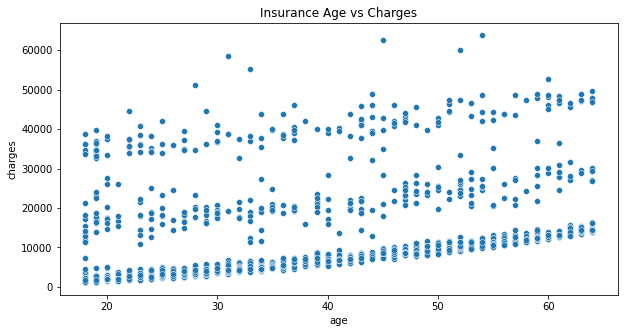

In [15]:
# Age vs Charges
sns.scatterplot(x=df.age,y=df.charges)
plt.title('Insurance Age vs Charges')
plt.show()

In [16]:
# Smokers vs No Smokers
df_smoker = df[df.smoker ==1].sample(50)
df_nonsmoker = df[df.smoker ==0].sample(50)

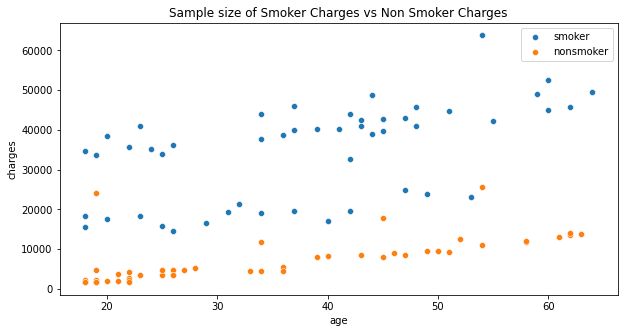

In [17]:
sns.scatterplot(x=df_smoker.age, y=df_smoker.charges, label='smoker')
sns.scatterplot(x=df_nonsmoker.age, y=df_nonsmoker.charges, label='nonsmoker')
plt.title('Sample size of Smoker Charges vs Non Smoker Charges')
plt.show()

We can observe that smokers cost more

# Linear Regression

In [18]:
#from scipy import stats

# y = mx + b
# y = slope(x) + intercept

# returns slope, intercept, rvalue, pvalue, stderr (represents the spread of the values to predicted)
m, b, r, p, err = stats.linregress(df.age, df.charges)

In [19]:
x = range(df.age.min(), df.age.max())
y = m * x + b

# Visualisations

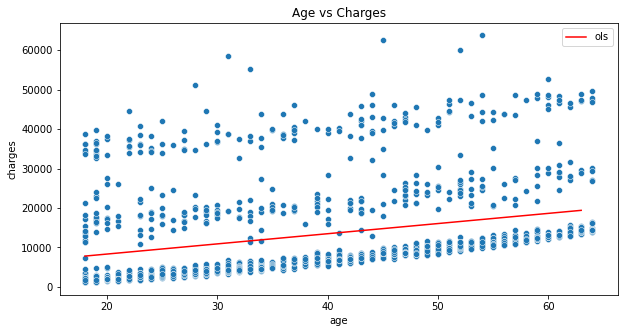

In [20]:
sns.lineplot(x=x, y=y, label='ols', color='r')
sns.scatterplot(x=df.age, y=df.charges)
plt.title('Age vs Charges')
plt.show()

As people get older, they get more insruance charges.

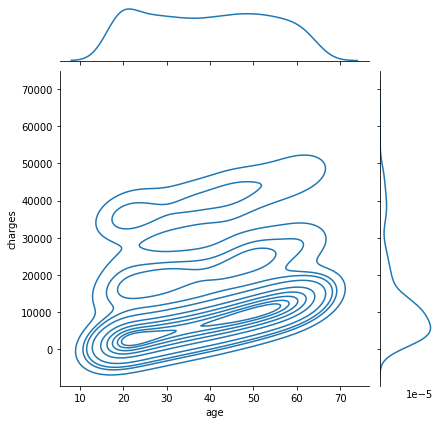

In [21]:
sns.jointplot(x=df.age, y=df.charges, kind='kde');

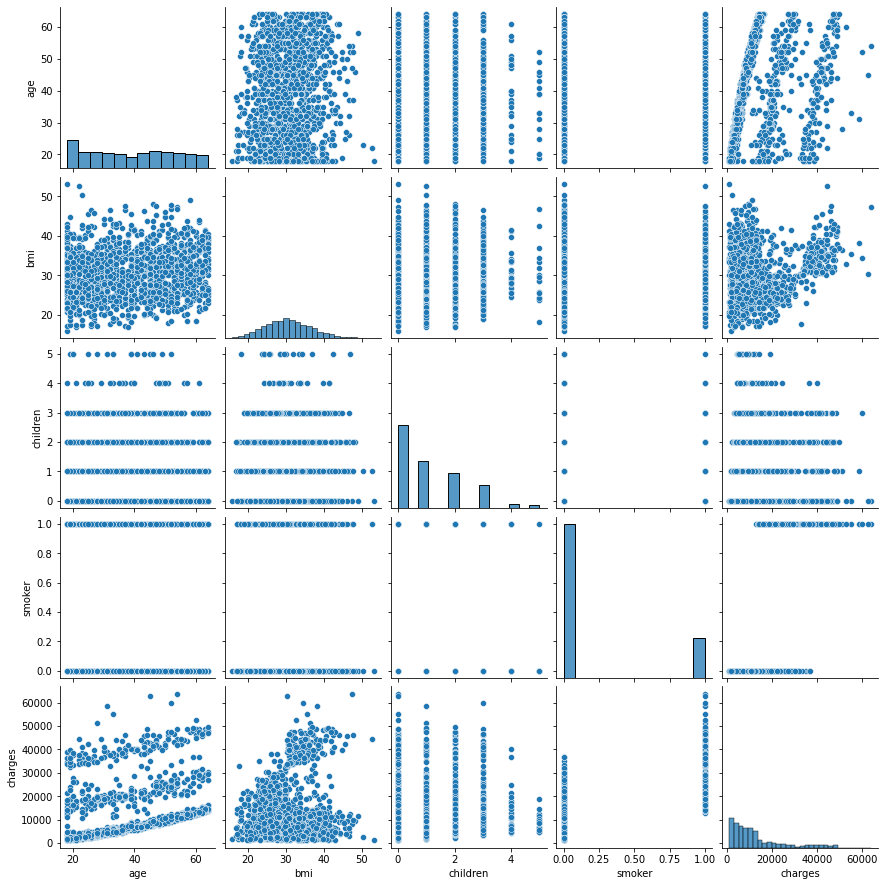

In [22]:
# sns.pairplot() automatically ignroes categorical features
sns.pairplot(df);

In [23]:
import plotly.express as px

In [24]:
fig = px.scatter_3d(df, x='age', y='charges', z='bmi', color='smoker', symbol='sex', size='age')
fig.show()

# Comparing Categorical Features: One-Way ANOVA $(F)$ and T-test (t)
**To find effect size of categorical features**

* **Assumption:**
* normal distribution of numerical label & categorical features
* equal variance of numeric variable for each categorical variable
* independently sampeld

**T-Test - Comparing Two Categorial Groups (Smoker vs NonSmoker)**
* Student's t-test - determine whether mean is different for each categorical featrue.
* statistiacally far apart means infers there is an affect of smoker on insurnace charges 
* i.e mean of charges is statistically different for smokers vs non-smokers.
* p-value < alpha for statistically significant

* t = diff between means divided by sum of both variance

**ANOVA - Comparing Multiple Categorial Groups (4 different regions)**
* Similar to t-statistic
* ANOVA performed for 2 groups will yield same effect size as t-test 


In [25]:
# T-TEST

In [26]:
from scipy import stats
import statistics as stat

In [27]:
edu_partialHighSchool = [30000, 10000, 10000, 20000, 70000, 30000, 10000, 20000, 10000, 30000]
edu_HighSchool = [20000, 30000, 60000, 20000, 40000, 60000, 60000]
edu_PartialCollege = [60000, 40000, 30000, 130000, 60000, 40000]
edu_Bachelors = [40000, 20000, 90000, 120000, 60000, 130000, 20000, 100000, 80000, 30000, 100000, 120000]
edu_Graduate = [160000, 50000, 80000, 30000, 40000, 80000, 130000, 100000, 130000, 50000, 130000]

## T-test - Compare a Single Pair 

In [28]:
#ttest_ind() for comparing Individual Pair
t, p = stats.ttest_ind(edu_partialHighSchool, edu_HighSchool)
print('t-value:', t)
print('p-value:', p)

t-value: -1.9131753750607228
p-value: 0.07500898731578687


**Higher values of the t-score** indicate that a large difference exists between the two sample sets. 


**The smaller the t-value,** the more similarity exists between the two sample sets.

Low p-value and T-value infers data are similar (but the data is so small to make a good inference)

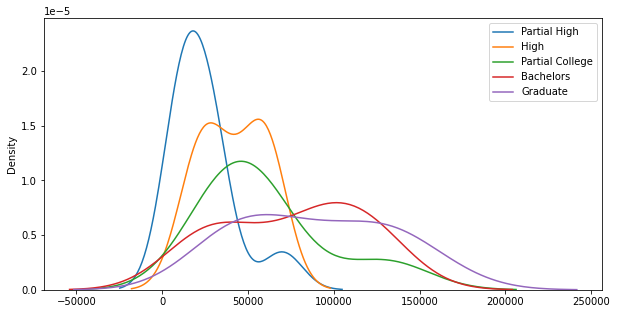

In [29]:
sns.kdeplot(edu_partialHighSchool,label='Partial High')
sns.kdeplot(edu_HighSchool, label='High')
sns.kdeplot(edu_PartialCollege, label='Partial College')
sns.kdeplot(edu_Bachelors, label='Bachelors')
sns.kdeplot(edu_Graduate, label='Graduate')
plt.legend();

## ANOVA - Compare Multiple Pairs

The higher the F-value in an ANOVA, the higher the variation between sample means relative to the variation within the samples.

In [30]:
f, p = stats.f_oneway(edu_partialHighSchool, edu_Bachelors, edu_HighSchool, edu_Graduate, edu_PartialCollege)
print('f-value:', f)
print('p-value:', p)

f-value: 5.778065095961635
p-value: 0.0008781084858501968


P-value indicates there is a statistically difference between all groups

Visually, although there are overlaps, the means are different

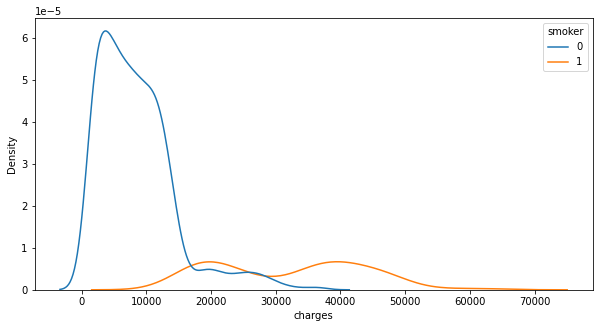

In [31]:
sns.kdeplot(data=df, x='charges', hue='smoker');

### Transforming data for ANOVA

In [32]:
feature = 'smoker'
label = 'charges'

df1 = df.groupby(feature)[label].apply(list)
df1

smoker
0    [1725.5523, 4449.462, 21984.47061, 3866.8552, ...
1    [16884.924, 27808.7251, 39611.7577, 36837.467,...
Name: charges, dtype: object

In [33]:
stats.f_oneway(*df1) 
# The '*' before df1 makes it automatically separate each sample by ','
# so dont need to manually input samples

F_onewayResult(statistic=2177.614868056519, pvalue=8.271435842182967e-283)

**Huge effect size for Smoker vs Charges, P-value is same as T-test**

In [34]:
feature = 'region'
label = 'charges'

df1 = df.groupby(feature)[label].apply(list)
stats.f_oneway(*df1)

F_onewayResult(statistic=2.96962669358912, pvalue=0.0308933560705201)

## Application on Bike buyers dataset

In [35]:
# new dataset
df = pd.read_csv('http://www.ishelp.info/data/bikebuyers.csv')
df.dtypes, df.shape

(ID                         int64
 Marital Status            object
 Gender                    object
 MaritalStatusNumeric       int64
 GenderNumeric              int64
 Income                     int64
 Children                   int64
 EducationNumeric           int64
 CommuteDistanceNumeric     int64
 Cars                       int64
 Age                        int64
 HomeOwnerNumeric           int64
 PurchaseBikeNumeric        int64
 Education                 object
 Occupation                object
 Home Owner                object
 Commute Distance          object
 Region                    object
 Purchased Bike            object
 dtype: object, (1000, 19))

### Glimpse dataset

**Immediately, we have an idea of the features and the label, and what tests we can use**
* Label -> Purchased Bike -> probably (Y/N)
* Tests to use:
  * ANOVA for categorical features, 
  * Correlation for numerical features

**This is good practice before we even look at the data**


In [36]:
df.head()

,ID,Marital Status,Gender,MaritalStatusNumeric,GenderNumeric,Income,Children,EducationNumeric,CommuteDistanceNumeric,Cars,Age,HomeOwnerNumeric,PurchaseBikeNumeric,Education,Occupation,Home Owner,Commute Distance,Region,Purchased Bike
0,19147,Married,Male,1,0,40000,0,4,1,1,42,0,0,Bachelors,Professional,No,0-1 Miles,North America,No
1,22296,Married,Male,1,0,70000,0,4,1,1,38,0,0,Bachelors,Professional,No,0-1 Miles,North America,No
2,25983,Married,Male,1,0,70000,0,4,1,1,43,0,0,Bachelors,Professional,No,0-1 Miles,North America,No
3,29134,Married,Male,1,0,60000,4,4,5,3,42,0,0,Bachelors,Skilled Manual,No,10+ Miles,North America,No
4,27388,Married,Male,1,0,60000,3,4,2,2,66,0,0,Bachelors,Management,No,1-2 Miles,North America,No


### **Clean Data**

In [37]:
df.Education.unique()

array(['Bachelors', 'Graduate Degree', 'High School', 'Partial College',
       'Partial High School'], dtype=object)

In [38]:
df['Education_rank'] = df['Education']
df.Education_rank.replace(['Partial High School', 'High School', 'Partial College', 'Bachelors', 'Graduate Degree'], [1,2,3,4,5], inplace=True)
df.Education_rank

0      4
1      4
2      4
3      4
4      4
      ..
995    1
996    1
997    1
998    1
999    1
Name: Education_rank, Length: 1000, dtype: int64

In [39]:
df['Commute Distance'].unique()

array(['0-1 Miles', '10+ Miles', '1-2 Miles', '2-5 Miles', '5-10 Miles'],
      dtype=object)

In [40]:
df['Commute_rank'] = df['Commute Distance']
df.Commute_rank.replace(['0-1 Miles', '10+ Miles', '1-2 Miles', '2-5 Miles', '5-10 Miles'], [0,1,2,5,10], inplace=True)
df.astype({'Commute_rank':'int64'})

df['Purchased Bike'].replace(['Yes', 'No'], [0,1], inplace=True)
df['Purchased Bike'].astype('int64')

df.head()

,ID,Marital Status,Gender,MaritalStatusNumeric,GenderNumeric,Income,Children,EducationNumeric,CommuteDistanceNumeric,Cars,...,HomeOwnerNumeric,PurchaseBikeNumeric,Education,Occupation,Home Owner,Commute Distance,Region,Purchased Bike,Education_rank,Commute_rank
0,19147,Married,Male,1,0,40000,0,4,1,1,...,0,0,Bachelors,Professional,No,0-1 Miles,North America,1,4,0
1,22296,Married,Male,1,0,70000,0,4,1,1,...,0,0,Bachelors,Professional,No,0-1 Miles,North America,1,4,0
2,25983,Married,Male,1,0,70000,0,4,1,1,...,0,0,Bachelors,Professional,No,0-1 Miles,North America,1,4,0
3,29134,Married,Male,1,0,60000,4,4,5,3,...,0,0,Bachelors,Skilled Manual,No,10+ Miles,North America,1,4,1
4,27388,Married,Male,1,0,60000,3,4,2,2,...,0,0,Bachelors,Management,No,1-2 Miles,North America,1,4,2


### Interpret results

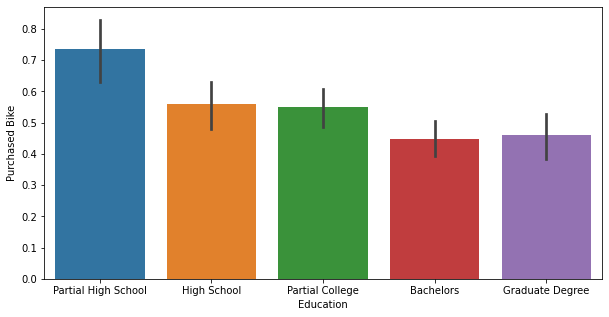

In [41]:
sns.barplot(data=df, x='Education', y='Purchased Bike',
            order=['Partial High School', 'High School', 'Partial College', 'Bachelors', 'Graduate Degree']);

In [42]:
r, p = stats.pearsonr(df['Education_rank'], df['Purchased Bike'])
print('Correlation:', r)
print('P-value:', p)

Correlation: -0.1407580442339139
P-value: 7.900806460290536e-06


**Pearson R is negative. and is statistically significant**
* this means as Education Rank goes up, purchased bike goes down
* which is consistent with barplot

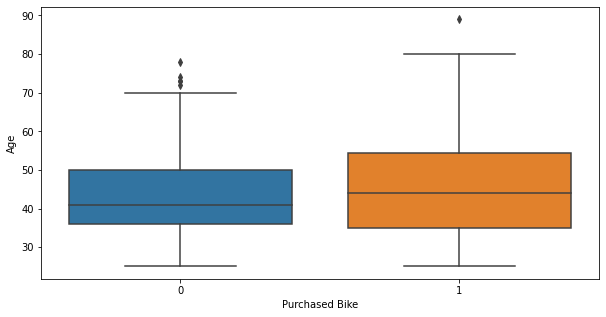

In [43]:
sns.boxplot(data=df, x='Purchased Bike', y='Age');

In [44]:
feature = 'Age'
label = 'Purchased Bike'

df1 = df.groupby(feature)[label].apply(list)
stats.f_oneway(*df1) 

F_onewayResult(statistic=2.626647603867683, pvalue=9.651221969737074e-09)

## Tukeyhsd method
**lots of groups lead to more combinations**

**This method makes it easier**

In [45]:
from statsmodels.stats.multicomp import MultiComparison


In [46]:
mc = MultiComparison(df['Purchased Bike'], df['Education'])
print(mc.tukeyhsd())

           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
     group1            group2       meandiff p-adj   lower  upper  reject
-------------------------------------------------------------------------
      Bachelors     Graduate Degree   0.0121    0.9 -0.1163 0.1404  False
      Bachelors         High School   0.1109 0.1206 -0.0162 0.2381  False
      Bachelors     Partial College   0.1032 0.0941 -0.0102 0.2166  False
      Bachelors Partial High School   0.2891  0.001  0.1159 0.4623   True
Graduate Degree         High School   0.0989 0.3296  -0.045 0.2428  False
Graduate Degree     Partial College   0.0912 0.3235 -0.0407  0.223  False
Graduate Degree Partial High School   0.2771  0.001  0.0913 0.4629   True
    High School     Partial College  -0.0077    0.9 -0.1385  0.123  False
    High School Partial High School   0.1782 0.0656 -0.0068 0.3632  False
Partial College Partial High School   0.1859 0.0322  0.0101 0.3617   True
--------------------------------------

# MLS / OLS in statsmodels.api

In [47]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [48]:
df = pd.read_csv('https://www.ishelp.info/data/insurance.csv')
df.dtypes, df.shape

(age           int64
 sex          object
 bmi         float64
 children      int64
 smoker       object
 region       object
 charges     float64
 dtype: object, (1338, 7))

In [49]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Numerical Variables

In [50]:
# identify label & features
label = 'charges' 
features = ['age', 'bmi', 'children']

# select X and Y data
y = df[label]
x = df[features].assign(const=1)

# create OLS Object 
model = sm.OLS(y, x)
results = model.fit() # .fit() is where it runs the regression to return r, t-test, p-value, etc

In [51]:
# print summary results using pandas.summary()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     60.69
Date:                Wed, 01 Feb 2023   Prob (F-statistic):           8.80e-37
Time:                        14:00:34   Log-Likelihood:                -14392.
No. Observations:                1338   AIC:                         2.879e+04
Df Residuals:                    1334   BIC:                         2.881e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age          239.9945     22.289     10.767      0.0

### Interpreting Regression Results

In [52]:
# ---=== R^2 ===---
# r^2 is 12%. 
# this means 12% of variation can be explained by the combination of the x variables
# so 88% is unexplained
# r^2 = (variation(mean) - variation(regression line)) / variation(mean)
# so it explains how different the regression line is to the Y-lable mean line 
# larger r^2 means more is explained by the regression line (combintation of x-variables)


# ---=== F-Statistic from ANOVA ===---
# H0: All group means are equal.
# The larger the F-statistic, the greater the difference between the group means.
# p-value uses F-distribution


# ---=== coef ===---
# H0: coefficient is 0
# Data is not scaled (age, BMI, children) so they cannot be compared directly
# need to standardize
# The t-stat can be compared
# Higher t-stat means more effect
# also look at P-value of t-stat so see if the effect is statistically significant
# so Age's coefficient is high and statistically significant

In [53]:
# MAKE PREDICTION
# we know the regression will be poor fit because r^2 is only 12%
df_pred = df.copy()
df_pred['prediction'] = results.fittedvalues
df_pred.head()

,age,sex,bmi,children,smoker,region,charges,prediction
0,19,female,27.900,0,yes,southwest,16884.92400,6908.777533
1,18,male,33.770,1,no,southeast,1725.55230,9160.977061
2,28,male,33.000,3,no,southeast,4449.46200,12390.946918
3,33,male,22.705,0,no,northwest,21984.47061,8543.527095
4,32,male,28.880,0,no,northwest,3866.85520,10354.147396


### Make a prediction

In [54]:
# MAKE SINGLE SCORE PREDICTION
# using f(x) = age, sex, bmi, children, constant of 1
print(results.predict([19, 27.9, 0, 1]))

[6908.77753344]


## Adding Categorical Variables using Dummy Codes
* r^s is only 12% for age, bmi, children

* so the next step is to try improve r^2 by adding Categorical data to try to explain Y

In [55]:
# First, turn categorical data to dummy numerical codes
df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

In [56]:
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [57]:
Y = df['charges']
X = df.drop('charges', axis=1).assign(const=1)

results = sm.OLS(Y, X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Wed, 01 Feb 2023   Prob (F-statistic):               0.00
Time:                        14:00:34   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
age                256.8564     11.899  

### Intepreting Regression Results

In [58]:
# Exact same interpretation but this time is a better fit!
# r^2 is now 75% !
# F-statistic show us variables are different and good set of combination

# ---=== coef ===---
# as people get older, it costs them 256k more, statistically significant
# etc...

## **Standardisation, Normalisation**
* Variables are in different scale
* Cannot make coef comparisons

In [59]:
from sklearn import preprocessing

In [60]:
# uses standard normal dist to scale them
# so 68, 95, 99.7 rule
# 3 zscore is probably outlier
df_zscore = pd.DataFrame(preprocessing.StandardScaler().fit_transform(df), columns = df.columns)
df_zscore.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,-1.438764,-0.453320,-0.908614,0.298584,-1.010519,1.970587,-0.566418,-0.611324,1.765481
1,-1.509965,0.509621,-0.078767,-0.953689,0.989591,-0.507463,-0.566418,1.635795,-0.566418
2,-0.797954,0.383307,1.580926,-0.728675,0.989591,-0.507463,-0.566418,1.635795,-0.566418
3,-0.441948,-1.305531,-0.908614,0.719843,0.989591,-0.507463,1.765481,-0.611324,-0.566418
4,-0.513149,-0.292556,-0.908614,-0.776802,0.989591,-0.507463,1.765481,-0.611324,-0.566418


In [61]:
y = df_zscore.charges
X = df_zscore.drop('charges', axis=1).assign(const=1)

results = sm.OLS(y,X).fit()
print(results.summary())                                         

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Wed, 01 Feb 2023   Prob (F-statistic):               0.00
Time:                        14:00:34   Log-Likelihood:                -968.66
No. Observations:                1338   AIC:                             1955.
Df Residuals:                    1329   BIC:                             2002.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
age                  0.2980      0.014  

In [62]:
# same results, just makes coef on same scaler
# allows us to compare coefficients.

# Test our assumptions
#Omnibus: looks at how normal our model is
#Omnibus and P-value indicates non-normality in our model, which needs to be fixed

# Scipy stats.distribution()

In [63]:
import scipy.stats as stats

# stats.distribution.rvs() generates random numbers from specified distribution
# stats.distribution.cdf() determines cumulative probability below an obvservation
# stats.distribution.ppf() finds the x, given the probability (reverse of cdf)
# stats.distribution.pdf() gives probability density at given x

## Uniform Distribution

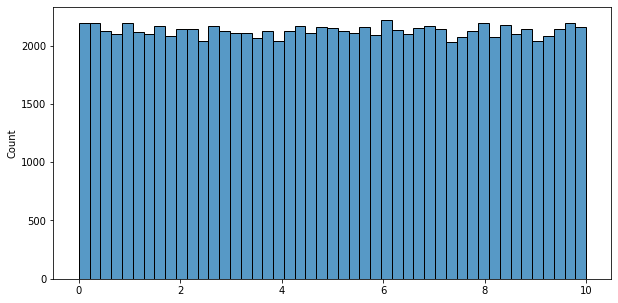

In [64]:
# Uniform Distribution - each value is equally likely

# rvs = random number
uniform_data = stats.uniform.rvs(size=100000, # Generate 100000 numbers
                                 loc=0, # from 0
                                 scale=10) # to 10

sns.histplot(uniform_data);                                 

In [65]:
stats.uniform.cdf(x=2.5, # find cdf below x
                  loc=0, # distributino start
                  scale=10) # dist end

0.25

In [66]:
stats.uniform.ppf(q=0.25,
                  loc=0,
                  scale=10)

# this should return x from uniform cdf

2.5

In [67]:
stats.uniform.pdf(2.5, loc=0, scale=10)
# 0 to 10 would have 10%, since the distribution starts at 0 to 10, and is equally distriubted

0.1

## Generating Random Numbers and Setting Seed

* W/O setting seed -> generate complete random number if we repeat the same code
* With seeting seed -> makes random number the same each time the code is run

* This is because random numbers are generated based on a starting seed *(so actually not truly random)*
* So using same SEED will generate same random number

In [68]:
import random

In [69]:
random.randint(0,10) # random int with specified range

9

In [70]:
[random.randint(0,10)]*4

[7, 7, 7, 7]

In [71]:
random.choice([2,4,6,8,10,12]) # random element from sequnece

4

In [72]:
random.random() # real number WITHIN 0 to 1

0.31042114705795465

In [73]:
random.uniform(0,10) # real number OUTSIDE of 0 to 1

7.351073448975623

In [74]:
random.seed(7) # set seed
print([random.uniform(0,10) for x in range(4)])

random.seed(7) # set same seed
print([random.uniform(0,10) for x in range(4)])

[3.238327648331624, 1.5084917392450192, 6.509344730398538, 0.7243628666754276]
[3.238327648331624, 1.5084917392450192, 6.509344730398538, 0.7243628666754276]


In [75]:
random.seed(7) # set seed
print([random.uniform(0,10) for x in range(4)])

random.seed(49) # set different seed
print([random.uniform(0,10) for x in range(4)])

[3.238327648331624, 1.5084917392450192, 6.509344730398538, 0.7243628666754276]
[0.6688397634275167, 4.132428164282594, 1.105047339461387, 7.52111461418534]


## Normal Distribution
my favourite!

In [76]:
plt.rcParams['figure.figsize'] = (10,5)

In [77]:
np.arange(-1, 1,.01) # np.arange(start, stop, step)
# returns evenly spaced numbers from -4 to -1 at an interval of 0.01

array([-1.0000000e+00, -9.9000000e-01, -9.8000000e-01, -9.7000000e-01,
       -9.6000000e-01, -9.5000000e-01, -9.4000000e-01, -9.3000000e-01,
       -9.2000000e-01, -9.1000000e-01, -9.0000000e-01, -8.9000000e-01,
       -8.8000000e-01, -8.7000000e-01, -8.6000000e-01, -8.5000000e-01,
       -8.4000000e-01, -8.3000000e-01, -8.2000000e-01, -8.1000000e-01,
       -8.0000000e-01, -7.9000000e-01, -7.8000000e-01, -7.7000000e-01,
       -7.6000000e-01, -7.5000000e-01, -7.4000000e-01, -7.3000000e-01,
       -7.2000000e-01, -7.1000000e-01, -7.0000000e-01, -6.9000000e-01,
       -6.8000000e-01, -6.7000000e-01, -6.6000000e-01, -6.5000000e-01,
       -6.4000000e-01, -6.3000000e-01, -6.2000000e-01, -6.1000000e-01,
       -6.0000000e-01, -5.9000000e-01, -5.8000000e-01, -5.7000000e-01,
       -5.6000000e-01, -5.5000000e-01, -5.4000000e-01, -5.3000000e-01,
       -5.2000000e-01, -5.1000000e-01, -5.0000000e-01, -4.9000000e-01,
       -4.8000000e-01, -4.7000000e-01, -4.6000000e-01, -4.5000000e-01,
      

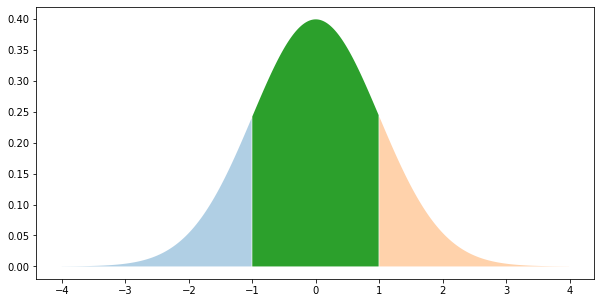

In [78]:
plt.fill_between(x=np.arange(-4,-1,0.01), 
                 y1 = stats.norm.pdf(np.arange(-4,-1,0.01)),
                 alpha=0.35)

plt.fill_between(x=np.arange(1,4,0.01), 
                 y1 = stats.norm.pdf(np.arange(1,4,0.01)),
                 alpha=0.35)

plt.fill_between(x=np.arange(-1,1,0.01), 
                 y1 = stats.norm.pdf(np.arange(-1,1,0.01)),
                 );

In [79]:
# the classic Hypothesis p-value
print(stats.norm.ppf(q=.05))
print(stats.norm.ppf(q=.95))

-1.6448536269514729
1.6448536269514722


In [80]:
print('68% rule: ', stats.norm.cdf(x=1) - stats.norm.cdf(x=-1))
print('95% rule: ', stats.norm.cdf(x=2) - stats.norm.cdf(x=-2))
print('99.7% rule: ', stats.norm.cdf(x=3) - stats.norm.cdf(x=-3))

68% rule:  0.6826894921370859
95% rule:  0.9544997361036416
99.7% rule:  0.9973002039367398


## Binomial Distribution

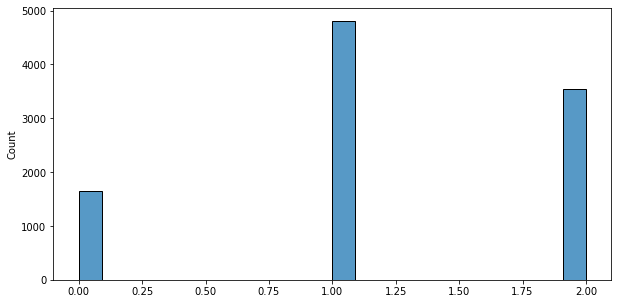

In [81]:
lebrons_ft = stats.binom.rvs(n = 2, # 2 free throws 
                             p=.6, # 80% probability of making all 2 free throws
                             size=10000)  # repeat 10000 times

sns.histplot(lebrons_ft);

## Geometric and Exponential Distribution
* Models the time it takes for an event to occur
* Example, the trials it takes to land a head

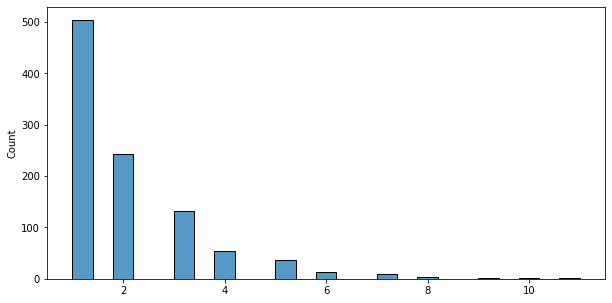

In [82]:
random.seed(12)

flips_till_heads = stats.geom.rvs(size=1000,
                                  p=0.5)

sns.histplot(flips_till_heads);

In [83]:
# Exponential distribution - a continuours version of geometric distirbution

# Example, model how long it takes for a LoL game to finish

## Poisson Distribution
* Models probability of seeing certain number of successes within a time interval

* For example: how many arrivals will occur within a time. traffic, number of arrivals a hospital can expect in a hour's time, number of emails expect to receive in a week

col_0    0     1     2     3     4    5    6    7   8   9   10  11  12
row_0                                                                 
counts  468  1465  2260  2316  1622  999  528  222  80  26  11   2   1


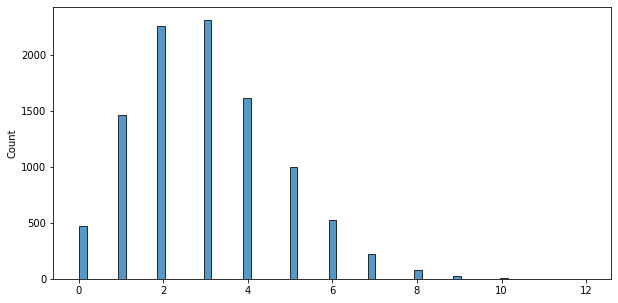

In [84]:
arrival_rate_1 = stats.poisson.rvs(size=10000, 
                 mu=3) # average arrival rate of 1

print(pd.crosstab(index='counts', columns=arrival_rate_1))

sns.histplot(arrival_rate_1);

# So we see most patients arrive to the hospital within around 2-4 hours

# More Statistical Inference
* Point estimate - sample data to make estimates on population
* Central limit theorem

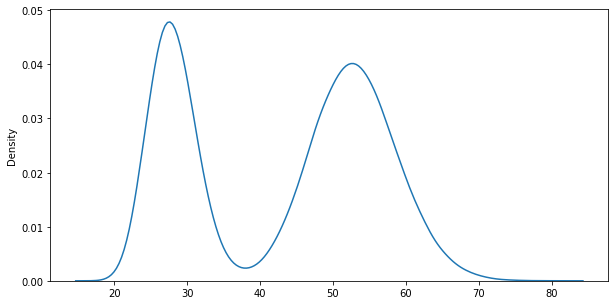

In [85]:
np.random.seed(10)
population_ages1 = stats.poisson.rvs(loc=18, mu=35, size=150000)
population_ages2 = stats.poisson.rvs(loc=18, mu=10, size=100000)
population_ages = np.concatenate((population_ages1, population_ages2))

sns.kdeplot(population_ages);

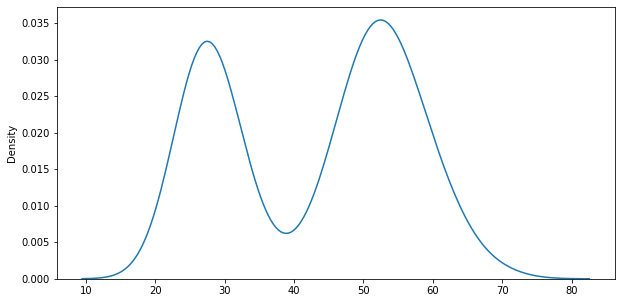

In [86]:
# draw a sample of 500
sample_age = np.random.choice(a = population_ages, size = 500)

sns.kdeplot(sample_age);

## Confidence Intervals
* Point estimators are prone to errors
* Taking more samples to reduce errors may not be feasbile
* One solution is to use confidence intervals
* Take a point estimate and +/- the standard error
* This creates a range

## When population $\sigma$ is known...
We can use z-test to compare Population Mean, and Sample Mean

**Margin of Error = $z * \frac{\sigma}{\sqrt{n}}$**

* stdev of pop
* n = sample size
* z-critical vlaue is std from norm dist
* So 95% is the typical 1.65z

In [87]:
# Get the 95% z-score
print('Everyone loves the 0.05 p-value: ', stats.norm.ppf(q = 0.95))

Everyone loves the 0.05 p-value:  1.6448536269514722


In [88]:
import numpy as np
import math

np.random.seed(10)

sample_size = 1000
sample = np.random.choice(a = population_ages, size = sample_size) # get 1,000 samples from population age's
sample_mean = sample.mean()

# get z-score for 95% Confidence Interval
z_critical = stats.norm.ppf(q = 0.95) # its 1.65stdev for 95% of data

# get population stdev
pop_stdev = population_ages.std()

# margin of error
margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))

# confidence interval
conf_int = (sample_mean - margin_of_error, sample_mean + margin_of_error)

print(conf_int)
print(sample_mean)

(41.834888075038016, 43.21111192496199)
42.523


In [89]:
# our sample mean is within the margin of error!

In [90]:
np.random.seed(10)
sample_size = 1000

intervals = []
sample_means = []

for sample in range(25):
  sample = np.random.choice(a = population_ages, size = sample_size)
  sample_mean = sample.mean()
  sample_means.append(sample_mean)

  # get z-score for 95% Confidence Interval
  z_critical = stats.norm.ppf(q = 0.95) # its 1.65stdev for 95% of data

  # get population stdev
  pop_stdev = population_ages.std()

  # margin of error
  margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))

  # confidence interval
  conf_int = (sample_mean - margin_of_error, sample_mean + margin_of_error)

  intervals.append(conf_int)

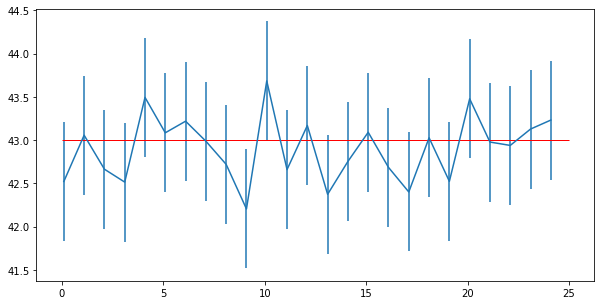

In [91]:
plt.errorbar(x=np.arange(0.1, 25, 1),
             y=sample_means,
             yerr=[(top-bot)/2 for top,bot in intervals],
             fmt='-');

plt.hlines(xmin=0, xmax=25,
           y=43,
           linewidth=1,
           color='red');

## When population $\sigma$ is unknown...
We have to use stdev of sample

* But the stdev of sample will have more errors
* To account for this error, we use t-critical value
* Same as normal distribution but gets adjusted for sample size

**t-distribution gets wider for smaller sample sizes**

In [92]:
import scipy.stats as stats

In [93]:
np.random.seed(10)

sample_size = 25

sample = np.random.choice(a = population_ages, size = sample_size)

sample_mean = sample.mean()

# get t-score for 95% Confidence Interval
t_critical = stats.t.ppf(q = 0.95, df = sample_size-1)

# get sample stdev
sample_stdev = sample.std(ddof=1)

# Standard Error, or Stdev
sigma = sample_stdev/math.sqrt(sample_size) 

# margin of error
margin_of_error = t_critical * sigma

# confidence interval
conf_int = (sample_mean - margin_of_error, sample_mean + margin_of_error)

print(conf_int)
print(sample_mean)

(38.54578040532631, 47.21421959467369)
42.88


In [94]:
# See the Confidence Interval has increased

In [95]:
import scipy.stats as stats

# T-interval by scipy package
stats.t.interval(alpha = 0.95, # Confidence Level
                 df = 24, # Dof
                 loc = sample_mean, # sample mean
                 scale = sigma) # standard error

(37.65147508161371, 48.108524918386294)

**This is my favourite topic🔥🔥**

From Datacamp:
* Z-score and p-values
* ANOVA and t-tests
* Chi-Squared Tests
* Assumptions in hypothesis testing
* Non-Parametric Tests
  * Wilcoxon-Mann-Whitney
  * Kruskal-Wallis

In python this can be done with scipy.stats

*Reviewing Hypothesis Testing*

Example, 

**H0:** no difference between the sample & pop

**Ha:** difference in both. Tests the CLT, Check that the data drawn from a distribution that is different than population 


## One-Sample T-Test
Checks whether sample mean differs from pop mean.

In [96]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import math


import seaborn as sns
import matplotlib.pyplot as plt

In [97]:
np.random.seed(6)

# Poisson because age is discrete
pop_age1 = stats.poisson.rvs(loc=18, mu=35, size=150000)
pop_age2 = stats.poisson.rvs(loc=18, mu=10, size=100000)
pop_ages = np.concatenate((pop_age1, pop_age2))

sydney_age1 = stats.poisson.rvs(loc=18, mu=30, size=30)
sydney_age2 = stats.poisson.rvs(loc=18, mu=10, size=20)
sydney_ages = np.concatenate((sydney_age1, sydney_age2))

print(pop_ages.mean(), sydney_ages.mean())

43.000112 39.26


In [98]:
# Although different means, ARE THEY STATISTICALLY DIFFERENT?
# in comes the t-test
t, p = stats.ttest_1samp(a = sydney_ages,           # sample mean
                  popmean = pop_ages.mean()) # pop mean

print('t: ',t, 'p-value: ',p)                  

t:  -2.5742714883655027 p-value:  0.013118685425061678


the "t" is interpeted same as the z-score

This tells us how much the sample mean deviates from null hypothesis mean.

In [99]:
# Get the 2.5% T-stat, and 97.5% T-stat for the 95% CI
l_tail = stats.t.ppf(q=.025, # a 95% CI (left-tail)
            df=49)

r_tail = stats.t.ppf(q=.975, # a 95% CI (right-tail)
            df=49)

# so any t-stat outside of this is in critical region
print('95% CI of t-distribution: ', l_tail, r_tail)

95% CI of t-distribution:  -2.0095752344892093 2.009575234489209


In [100]:
# find p-value of t-statistic
stats.t.cdf(x= t,     
            df=49)*2  # because 2 tail

0.013118685425061678

In [101]:
# REJECT NULL HYPOTHESIS
# The t-statistic away from 0 and outside our 95% CI
# also the p-value is statistically significant
# so statistically there is a difference in sample & pop mean


# Now we should find the CI in mean 
sigma = sydney_ages.std() / math.sqrt(50)

stats.t.interval(0.95, # CI                    
                 df = 49, # dof
                 loc = sydney_ages.mean(), # sample mean
                 scale=sigma) # SE

(36.369669080722176, 42.15033091927782)

## Two-Sample T-Test
comparing two indepenedent data sample menas

H0: both samples mean is the same

Ha: they come from different idstribution

In [102]:
np.random.seed(12)

adelaide_ages1 = stats.poisson.rvs(loc=18, mu=33, size=30)
adelaide_ages2 = stats.poisson.rvs(loc=18, mu=13, size=20)
adelaide_ages = np.concatenate((adelaide_ages1, adelaide_ages2))

adelaide_ages.mean()

42.8

In [103]:
stats.ttest_ind(a=adelaide_ages, # sample data 1
                b=sydney_ages, # sample data 2
                equal_var=False) # Specify sample variance equal or not


# T-stat is 1.7t from 0
# p-value is 0.9 indicating a different with 90% CI               

Ttest_indResult(statistic=1.7083870793286842, pvalue=0.09073104343957748)

## Paired T-Test
The above Two-Sample T-Test compares 2 independent groups


But to test the same sample taken at different times, we use Paired T-Test.

H0: same sample


Ha: different sample

**Example: checking weight loss of same group of patients before and after treatment. Paired T-Test allows to check if same sample is different over time**


In [104]:
np.random.seed(11)

before = stats.norm.rvs(scale=30, loc=250, size=100)
after = before + stats.norm.rvs(scale=5, loc=-1.25, size=100)

weight_df = pd.DataFrame({'weight_before': before,
                          'weight_after': after,
                          'weight_change': after-before})

weight_df.describe()

# Mean is differnet. But is it statistically significant?

,weight_before,weight_after,weight_change
count,100.000000,100.000000,100.000000
mean,250.345546,249.115171,-1.230375
std,28.132539,28.422183,4.783696
min,170.400443,165.913930,-11.495286
25%,230.421042,229.148236,-4.046211
50%,250.830805,251.134089,-1.413463
75%,270.637145,268.927258,1.738673
max,314.700233,316.720357,9.759282


In [105]:
stats.ttest_rel(a=before,
                b=after)

# YES THEY ARE STATISTICALLY DIFFERENT USING 95% CI

Ttest_relResult(statistic=2.5720175998568284, pvalue=0.011596444318439857)

## Type I and Type II Error
**Type I - False Positive**
* Reject null hypothesis when it turns out to be true.
* Can happen when using too low CI
* Example, 90% CI leads 10% to be extreme 
* But 95% is only 5% to be extreme so less chance of rejecting null and lowering chance of False positive


**So why not set 99% CI to avoid False Positive?**

**Type II - False Negative**
* When there is a difference, but you failed to reject null because u have too strict CI, Example 99.5% 

## Chi-Squared Goodness-Of-Fit Test
* Used on categorical data. Same as T-test
* Check whether sample means differ from population mean but on categorical data
* **Example:, check if demographic features are different**


`stats.chisquare(f_obs = observed, 
f_exp = expected)`

In [106]:
import numpy as np 
import pandas as pd
import scipy.stats as stats

In [107]:
national = pd.DataFrame(['white']*100000 + ['hispanic']*60000 +\
                        ['black']*50000 + ['asian']*15000 + ['other']*35000)

adelaide = pd.DataFrame(['white']*600 + ['hispanic']*300 + \
                        ['black']*250 + ['asian']*75 + ['other']*150)

nat_table = pd.crosstab(index=national[0], columns='count')
ade_table = pd.crosstab(index=adelaide[0], columns='count')

print(nat_table)
print(ade_table)

col_0      count
0               
asian      15000
black      50000
hispanic   60000
other      35000
white     100000
col_0     count
0              
asian        75
black       250
hispanic    300
other       150
white       600


In [108]:
# Are these distirbutiosn of cateogrical features different?

# sum of (observed - expected)^2 / expected

observed = ade_table

nat_ratios = nat_table / len(national) # get population proportions
print(nat_ratios)

expected = nat_ratios * len(adelaide) # get expected sample counts using pop distribution

chi_squared_test = (((observed-expected)**2)/expected).sum()
print(chi_squared_test)

col_0        count
0                 
asian     0.057692
black     0.192308
hispanic  0.230769
other     0.134615
white     0.384615
col_0
count    18.194805
dtype: float64


In [109]:
crit = stats.chi2.ppf(q=0.95, # find critical value for 95% CI (Chi-squared is one-tail)
                      df = 4) # 
print(crit)

9.487729036781154


In [110]:
# from our 18 chi_squared value, we know its in critical region
# because its beyond 9.48, the 95% CI

# Lets check this with p-value

# for p-value we use CDF to find probability below the crit value
p = 1 - stats.chi2.cdf(x = chi_squared_test,
                       df=4)
print(p)

# so p-vale is < 0.05, which also indicate statistically different distributions

[0.00113047]


In [111]:
# OF COURSE WE CAN DO IT WITH SCIPY
stats.chisquare(f_obs = observed, # observed
                f_exp = expected) # expected

Power_divergenceResult(statistic=array([18.19480519]), pvalue=array([0.00113047]))

## Chi-Squared Test of Independence

* H0: are independent
* Ha: not independent
* Tests whether 2 categorical variables are independent
**Applications:**
* check whether variables: political views, education, religion are independent

In [112]:
np.random.seed(10)

# random sample
voter_race = np.random.choice(a=['asian', 'black','hispanic','other', 'white'],
                              p = [0.05, 0.15, 0.25, 0.05, 0.5],
                              size=1000)

voter_party = np.random.choice(a=['democrat','independent','republican'],
                               p=[0.4,0.2,0.4],
                               size=1000)

voters = pd.DataFrame({'race':voter_race,
                       'party': voter_party})

voter_tab = pd.crosstab(voters.race, voters.party, margins=True) 
voter_tab.columns = ['democrat', 'independent', 'republican', 'row_total']
voter_tab.index = ['asina', 'black', 'hispanic', 'other', 'white', 'col_total']

observed = voter_tab.iloc[0:5, 0:3]
voter_tab

,democrat,independent,republican,row_total
asina,21,7,32,60
black,65,25,64,154
hispanic,107,50,94,251
other,15,8,15,38
white,189,96,212,497
col_total,397,186,417,1000


In [113]:
print('t: ', stats.chi2_contingency(observed=observed)[0])
print('p-value: ', 1-stats.chi2_contingency(observed=observed)[1])

# they are independent

t:  7.169321280162059
p-value:  0.48152060705115796


## ANOVA Review
* Uses f-distribution
* Check if a numeric response variable varies according to the groups of categorical explanatory variables
* Example, does different religion affect IQ score?

`import scipy.stats as stats`

`stats.f_oneway()`


In [114]:
import numpy as np
import pandas as pd
import scipy.stats as stats 

import seaborn as sns
import matplotlib.pyplot as plt

In [115]:
# Compare race vs voter age

np.random.seed(12)

races = ['asian', 'black', 'hispanic', 'other', 'white']

voter_race = np.random.choice(a= races,
                              p = [0.05, 0.15, 0.25, 0.05, 0.5],
                              size=1000)

voter_age = stats.poisson.rvs(loc=18, # 
                              mu=30,
                              size=1000)

voter_frame = pd.DataFrame({'race':voter_race,'age': voter_age})

# Fastest way to format data to pass into stats.f_oneway()
groups = voter_frame.groupby('race')['age'].apply(list)

stats.f_oneway(*groups)

# NOT INDEPENDENT, but how do we know which ones?

F_onewayResult(statistic=1.7744689357329695, pvalue=0.13173183201930463)

## Using OLS for ANOVA 

In [116]:
# Alternative Way to yield F-statistic and p-value
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [117]:
model = ols('age ~ race',
              data=voter_frame).fit()

anova_result = sm.stats.anova_lm(model, typ=2) 

anova_result

# Means dont differ with Race groups

,sum_sq,df,F,PR(>F)
race,199.369,4.0,1.774469,0.131732
Residual,27948.102,995.0,NaN,NaN


In [118]:
# GENERATE NEW DATA

np.random.seed(12)

voter_race = np.random.choice(a= races,
                              p = [0.05, 0.15, 0.25, 0.05, 0.5],
                              size=1000)

white_ages = stats.poisson.rvs(loc=18, # 
                              mu=32,
                              size=1000)

voter_age = stats.poisson.rvs(loc=18, # 
                              mu=30,
                              size=1000)

voter_age = np.where(voter_race=='white', white_ages, voter_age)


voter_frame = pd.DataFrame({'race':voter_race,'age': voter_age})
groups = voter_frame.groupby('race')['age'].apply(list)


# RUN TEST
stats.f_oneway(*groups)
# NOW THEY ARE INDEPENDENT, THE WHITE GROUPS OF COURSE, BECAUSE WE CHANGED IT

F_onewayResult(statistic=10.164699828386366, pvalue=4.5613242113994585e-08)

In [119]:
model = ols('age ~ race',
              data=voter_frame).fit()

anova_result = sm.stats.anova_lm(model, typ=2) 

anova_result

,sum_sq,df,F,PR(>F)
race,1284.123213,4.0,10.1647,4.561324e-08
Residual,31424.995787,995.0,NaN,NaN


## Post-Hoc Test: Finding the groups that are different
* Basically a For Loop for all pairs
* The ANOVA f-stat showed us if there were differences in means of groups
* But we want to know which groups!
* Use Post-Hoc Test

## Tukey HSD Test
* another post-hoc test

`from statsmodels.stats.multicomp import pairwise_tukeyhsd`

In [120]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1   group2  meandiff p-adj   lower  upper  reject
-------------------------------------------------------
   asian    black  -0.8032    0.9 -3.4423  1.836  False
   asian hispanic   0.4143    0.9 -2.1011 2.9297  False
   asian    other  -1.0645 0.8852 -4.2391   2.11  False
   asian    white   1.9547  0.175 -0.4575 4.3668  False
   black hispanic   1.2175 0.2318  -0.386  2.821  False
   black    other  -0.2614    0.9 -2.7757  2.253  False
   black    white   2.7579  0.001  1.3217  4.194   True
hispanic    other  -1.4789 0.4391  -3.863 0.9053  False
hispanic    white   1.5404  0.004  0.3468  2.734   True
   other    white   3.0192 0.0028  0.7443 5.2941   True
-------------------------------------------------------


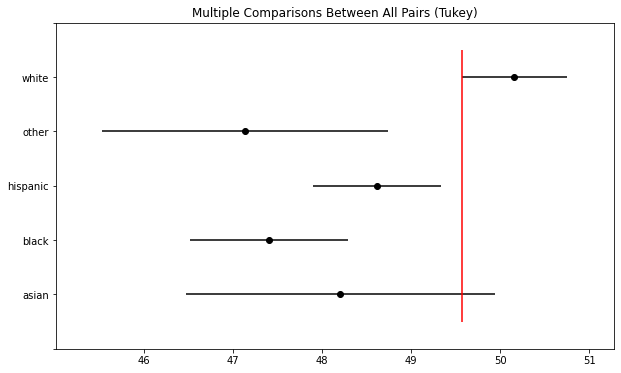

In [121]:
tukey = pairwise_tukeyhsd(endog=voter_age,
                         groups=voter_race, 
                         alpha = 0.05)

tukey.plot_simultaneous();
plt.vlines(x=49.57, ymin=-0.5, ymax=4.5, color='red')

print(tukey.summary())

In [122]:
# We can see the WHITE is significantly different to other races
# Tukey HSD table also shows to Reject all comparisons to White.
# Except of Asian, since the variance is pretty high, so not enough p-value

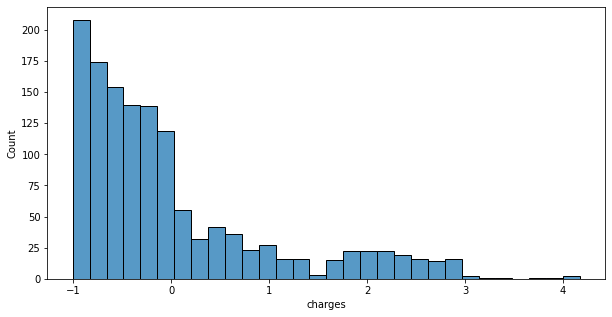

In [123]:
sns.histplot(df_zscore.charges);

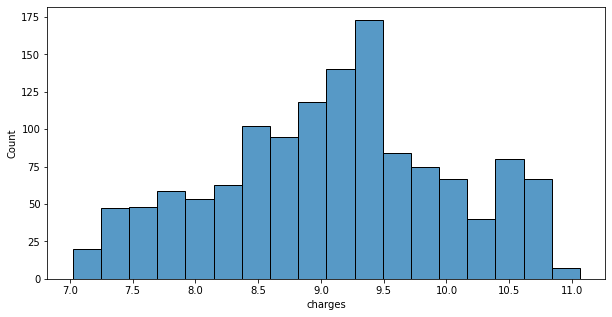

In [124]:
# currently is right skew
# need to adjust the distirbution with a mathematical equaiton so it beocmes more normal
sns.histplot(np.log(df.charges));

In [125]:
y = np.log(df.charges)
X = df.drop('charges', axis=1).assign(const=1)

results = sm.OLS(y, X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     549.8
Date:                Wed, 01 Feb 2023   Prob (F-statistic):               0.00
Time:                        14:00:41   Log-Likelihood:                -808.52
No. Observations:                1338   AIC:                             1635.
Df Residuals:                    1329   BIC:                             1682.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
age                  0.0346      0.001  